

<span style="color: yellow;">
	
# 1. Importing Libs
	
</span>
<br>

In [351]:
import numpy as np 
import pandas as pd 


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA, IncrementalPCA
from imblearn.over_sampling import SMOTE

import xgboost as xgb 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import datetime as dt 


In [352]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [353]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]


<span style="color: yellow;">
	
# 2. Data pre-processing
	
</span>
<br>

In [354]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [355]:
def GetFeaturesViaDatatypes(Dataframe, Datatypes):
    """Gets elements from dataframe with specified data types

    Dataframe : The master datframe whose data need to analysed.

    Datatypes : Datatypes of those features need to be extracted.

    """
    return Dataframe.select_dtypes(include=Datatypes).columns.values

In [356]:
def GetNulls(Dataframe):
    """Gets null percent of the different features in a dataframe.

     Dataframe : The master datframe whose data need to analysed.

    """
    pd.set_option('display.max_rows', None)
    null_df = pd.concat([Dataframe.isnull().sum(), round(Dataframe.isnull().sum()/Dataframe.shape[0]*100,2)], axis=1)
    null_df.columns = ['LabelNullCount', 'NullPercent']
    return null_df.sort_values(by = 'NullPercent', ascending = False)

In [357]:
def DeleteFromNpArray(InputArray, Elements):
    """Delete elements from a np array.

    InputArray : Input array from which elements will be deleted.

    Elements : Elements to be deleted from the array.

    """
    for element in Elements:
        indexes = np.where(InputArray == element)[0]
        InputArray = np.delete(InputArray, indexes)
    return InputArray

**Deleting un-important features**

In [358]:
tag_features = ['mobile_number', 'circle_id']

date_features = ['last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8',
                'last_date_of_month_9',
                'date_of_last_rech_6',
                'date_of_last_rech_7',
                'date_of_last_rech_8',
                'date_of_last_rech_9',
                'date_of_last_rech_data_6',
                'date_of_last_rech_data_7',
                'date_of_last_rech_data_8',
                'date_of_last_rech_data_9'
                ]
                                
#telecom = telecom.pop(tag_features , axis=1)
telecom = telecom.drop(date_features , axis=1)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  sachet_3g_9  \
0  197.385  214.816  213.803   21.100          NaN  ...            0   
1   34.047  355.074  268.321   86.285        24.11  ...            0   
2  167.690  189.058  210.226  290.714        11.54  ...            0   
3  221.338  251.102  508.054  389.500        99.91  ...            0   
4  261.636  309.876  238.174  163.426        50.31  ...            0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  \
0        1.0        1.0        1.0        NaN   968        30.4         0.0   
1        NaN        1.0        1.0        NaN  1006         0.0         0.0   
2        NaN        NaN        NaN        1.0  1103         0.0         0.0   
3        NaN        NaN        NaN        NaN  2491         0.0         0.0   
4        0.0        NaN        NaN        NaN  1526         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  

[5 rows x 214 columns]



<span style="color: orange;">
	
**Get numerical features**

	
</span>

In [359]:
numeric_features = GetFeaturesViaDatatypes(telecom,['float', 'int64', 'int32'] )
numeric_features, len(numeric_features)

(array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
        'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
        'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
        'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
        'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
        'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
        'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
        'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
        'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
        'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
        'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
        'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
        'std_og_t2m_



<span style="color: orange;">
	
**Get categorical features**

	
</span>

In [360]:
categorical_features = GetFeaturesViaDatatypes(telecom, [ 'object', 'int64'])
categorical_features

array(['mobile_number', 'circle_id', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon'],
      dtype=object)

<br>
<span style="color: orange;">
	
**By looking at the upper array and the data set following are found to categorical variables**

</span>
<br>

In [361]:
         
categorical_features =  [
                        'night_pck_user_6',
                        'night_pck_user_7',
                        'night_pck_user_8',
                        'fb_user_6',
                        'fb_user_7',
                        'fb_user_8',
                        'monthly_3g_7',
                        'monthly_3g_6',
                        'monthly_3g_8',
                        'monthly_2g_7',
                        'monthly_2g_6',
                        'monthly_2g_8'
                        ]

**Since categorical features are numbers so it has been misinterprated in the numerical features, so we need to delete them from the numerical features array**

In [362]:
numeric_features = DeleteFromNpArray(numeric_features, categorical_features)
numeric_features[:25], len(categorical_features) , len(numeric_features)

(array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
        'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
        'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
        'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
        'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
       dtype=object),
 12,
 202)

In [363]:
_BData = GetNulls(telecom[numeric_features])
_BData.head(50)

LabelNullCount  NullPercent
arpu_3g_6                    74846        74.85
count_rech_3g_6              74846        74.85
total_rech_data_6            74846        74.85
max_rech_data_6              74846        74.85
count_rech_2g_6              74846        74.85
arpu_2g_6                    74846        74.85
av_rech_amt_data_6           74846        74.85
arpu_3g_7                    74428        74.43
count_rech_3g_7              74428        74.43
total_rech_data_7            74428        74.43
arpu_2g_7                    74428        74.43
max_rech_data_7              74428        74.43
count_rech_2g_7              74428        74.43
av_rech_amt_data_7           74428        74.43
arpu_2g_9                    74077        74.08
av_rech_amt_data_9           74077        74.08
night_pck_user_9             74077        74.08
fb_user_9                    74077        74.08
count_rech_3g_9              74077        74.08
max_rech_data_9              74077        74.08
total_rech_data_9            74077        74.08
arpu_3g_9                    74077        74.08
count_rech_2g_9              74077        74.08
arpu_3g_8                    73660        73.66
arpu_2g_8                    73660        73.66
total_rech_data_8            73660        73.66
max_rech_data_8              73660        73.66
av_rech_amt_data_8           73660        73.66
count_rech_3g_8              73660        73.66
count_rech_2g_8              73660        73.66
std_og_t2f_mou_9              7745         7.75
std_ic_t2f_mou_9              7745         7.75
ic_others_9                   7745         7.75
std_og_t2m_mou_9              7745         7.75
isd_ic_mou_9                  7745         7.75
loc_og_mou_9                  7745         7.75
std_og_t2c_mou_9              7745         7.75
loc_ic_mou_9                  7745         7.75
og_others_9                   7745         7.75
std_og_mou_9                  7745         7.75
spl_ic_mou_9                  7745         7.75
spl_og_mou_9                  7745         7.75
std_ic_t2o_mou_9              7745         7.75
std_og_t2t_mou_9              7745         7.75
loc_ic_t2t_mou_9              7745         7.75
loc_og_t2t_mou_9              7745         7.75
onnet_mou_9                   7745         7.75
loc_ic_t2f_mou_9              7745         7.75
offnet_mou_9                  7745         7.75
roam_ic_mou_9                 7745         7.75

In [364]:
_BNullFeatures = _BData[_BData.NullPercent > 70.0].index.values
_BNullFeatures

array(['arpu_3g_6', 'count_rech_3g_6', 'total_rech_data_6',
       'max_rech_data_6', 'count_rech_2g_6', 'arpu_2g_6',
       'av_rech_amt_data_6', 'arpu_3g_7', 'count_rech_3g_7',
       'total_rech_data_7', 'arpu_2g_7', 'max_rech_data_7',
       'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_9',
       'av_rech_amt_data_9', 'night_pck_user_9', 'fb_user_9',
       'count_rech_3g_9', 'max_rech_data_9', 'total_rech_data_9',
       'arpu_3g_9', 'count_rech_2g_9', 'arpu_3g_8', 'arpu_2g_8',
       'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'count_rech_3g_8', 'count_rech_2g_8'], dtype=object)

In [365]:
telecom[_BNullFeatures].describe(include='all')

arpu_3g_6  count_rech_3g_6  total_rech_data_6  max_rech_data_6  \
count  25153.000000     25153.000000       25153.000000     25153.000000   
mean      89.555057         0.599133           2.463802       126.393392   
std      193.124653         1.274428           2.789128       108.477235   
min      -30.820000         0.000000           1.000000         1.000000   
25%        0.000000         0.000000           1.000000        25.000000   
50%        0.480000         0.000000           1.000000       145.000000   
75%      122.070000         1.000000           3.000000       177.000000   
max     6362.280000        29.000000          61.000000      1555.000000   

       count_rech_2g_6     arpu_2g_6  av_rech_amt_data_6     arpu_3g_7  \
count     25153.000000  25153.000000        25153.000000  25571.000000   
mean          1.864668     86.398003          192.600982     89.384120   
std           2.570254    172.767523          192.646318    195.893924   
min           0.000000    -35.830000            1.000000    -26.040000   
25%           1.000000      0.000000           82.000000      0.000000   
50%           1.000000     10.830000          154.000000      0.420000   
75%           2.000000    122.070000          252.000000    119.560000   
max          42.000000   6433.760000         7546.000000   4980.900000   

       count_rech_3g_7  total_rech_data_7  ...  total_rech_data_9  \
count     25571.000000       25571.000000  ...       25922.000000   
mean          0.621720           2.666419  ...           2.441170   
std           1.394524           3.031593  ...           2.516339   
min           0.000000           1.000000  ...           1.000000   
25%           0.000000           1.000000  ...           1.000000   
50%           0.000000           1.000000  ...           2.000000   
75%           1.000000           3.000000  ...           3.000000   
max          35.000000          54.000000  ...          84.000000   

          arpu_3g_9  count_rech_2g_9     arpu_3g_8     arpu_2g_8  \
count  25922.000000     25922.000000  26339.000000  26339.000000   
mean     100.264116         1.781807     91.173849     86.599478   
std      216.291992         2.214701    188.180936    168.247852   
min      -71.090000         0.000000    -24.490000    -55.830000   
25%        0.000000         1.000000      0.000000      0.000000   
50%        2.605000         1.000000      0.880000      9.270000   
75%      140.010000         2.000000    122.070000    122.070000   
max    13884.310000        40.000000   3716.900000   3483.170000   

       total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  \
count       26339.000000     26339.000000        26339.000000   
mean            2.651999       125.717301          197.526489   
std             3.074987       109.437851          191.301305   
min             1.000000         1.000000            0.500000   
25%             1.000000        25.000000           87.000000   
50%             1.000000       145.000000          154.000000   
75%             3.000000       179.000000          252.000000   
max            60.000000      1555.000000         4076.000000   

       count_rech_3g_8  count_rech_2g_8  
count     26339.000000     26339.000000  
mean          0.635711         2.016288  
std           1.422827         2.720132  
min           0.000000         0.000000  
25%           0.000000         1.000000  
50%           0.000000         1.000000  
75%           1.000000         2.000000  
max          45.000000        44.000000  

[8 rows x 30 columns]


<br>
<span style="color: orange;">

**Observations**

    ○ All data from june, july and august have missing data.

    ○ Since we need this data for analysis, we will impute them with zero - which in otherwise will signify  no recharge done or its count.


</span>
<br>



<span style="color: orange;">
	

**Imputing all the numerical features with null values more than 70% with zero**
	
</span>

In [366]:
telecom[_BNullFeatures] = telecom[_BNullFeatures].apply(lambda x : x.fillna(0))
telecom[_BNullFeatures].head()

arpu_3g_6  count_rech_3g_6  total_rech_data_6  max_rech_data_6  \
0     212.17              1.0                1.0            252.0   
1       0.00              0.0                0.0              0.0   
2       0.00              0.0                0.0              0.0   
3       0.00              0.0                0.0              0.0   
4       0.00              0.0                1.0             56.0   

   count_rech_2g_6  arpu_2g_6  av_rech_amt_data_6  arpu_3g_7  count_rech_3g_7  \
0              0.0     212.17               252.0     212.17              1.0   
1              0.0       0.00                 0.0       0.00              0.0   
2              0.0       0.00                 0.0       0.00              0.0   
3              0.0       0.00                 0.0       0.00              0.0   
4              1.0       0.00                56.0       0.00              0.0   

   total_rech_data_7  ...  total_rech_data_9  arpu_3g_9  count_rech_2g_9  \
0                1.0  ...                0.0       0.00              0.0   
1                1.0  ...                0.0       0.00              0.0   
2                0.0  ...                1.0       2.84              1.0   
3                0.0  ...                0.0       0.00              0.0   
4                0.0  ...                0.0       0.00              0.0   

   arpu_3g_8  arpu_2g_8  total_rech_data_8  max_rech_data_8  \
0     212.17     212.17                1.0            252.0   
1       0.00       7.60                2.0             25.0   
2       0.00       0.00                0.0              0.0   
3       0.00       0.00                0.0              0.0   
4       0.00       0.00                0.0              0.0   

   av_rech_amt_data_8  count_rech_3g_8  count_rech_2g_8  
0               252.0              1.0              0.0  
1                50.0              0.0              2.0  
2                 0.0              0.0              0.0  
3                 0.0              0.0              0.0  
4                 0.0              0.0              0.0  

[5 rows x 30 columns]

In [367]:
_BData = GetNulls(telecom[numeric_features])
_BNullFeatures = _BData[_BData.NullPercent > 0.0].index.values
_BNullFeatures[:25]

array(['spl_og_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2f_mou_9',
       'loc_ic_mou_9', 'loc_ic_t2m_mou_9', 'roam_og_mou_9',
       'std_ic_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2m_mou_9',
       'loc_ic_t2t_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'std_ic_t2t_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_mou_9', 'std_ic_t2o_mou_9', 'roam_ic_mou_9',
       'offnet_mou_9', 'std_og_mou_9', 'ic_others_9', 'isd_og_mou_9',
       'isd_ic_mou_9', 'og_others_9', 'spl_ic_mou_9'], dtype=object)



<span style="color: orange;">
	
**Imputing all the numerical features with null values less than 70% but greater than 0 with mean**

</span>


In [368]:

#telecom[_BNullFeatures] = telecom[_BNullFeatures].apply(lambda x : x.mean())

In [369]:
telecom[numeric_features].isnull().sum().sum()

609705

In [370]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  sachet_3g_9  \
0  197.385  214.816  213.803   21.100          NaN  ...            0   
1   34.047  355.074  268.321   86.285        24.11  ...            0   
2  167.690  189.058  210.226  290.714        11.54  ...            0   
3  221.338  251.102  508.054  389.500        99.91  ...            0   
4  261.636  309.876  238.174  163.426        50.31  ...            0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  \
0        1.0        1.0        1.0        0.0   968        30.4         0.0   
1        NaN        1.0        1.0        0.0  1006         0.0         0.0   
2        NaN        NaN        NaN        1.0  1103         0.0         0.0   
3        NaN        NaN        NaN        0.0  2491         0.0         0.0   
4        0.0        NaN        NaN        0.0  1526         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  

[5 rows x 214 columns]

In [371]:
telecom.shape

(99999, 214)

In [372]:
def GetFeatureNames(FeatureIdentifier : str, DataFrame ):
    """[Gets the features whose names are matching with feature identifier]

    Args:
        FeatureIdentifier ([str]): String which going to get match with the feature names
        DataFrame ([pd dataframe]): Master dataframe

    Returns:
        [np array]: [description]
    """
    return DataFrame.columns[DataFrame.columns.str.contains(pat = FeatureIdentifier)].values



<span style="color: orange;">
	
**Get the recharge feature names by using the specified keywords**

	
</span>

In [373]:
recharge_features = GetFeatureNames('rech_amt|rech_data', telecom)
recharge_features

array(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype=object)

In [374]:
telecom[recharge_features].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       99999.000000     99999.000000     99999.000000     99999.000000   
mean            0.632806        31.792048        32.406314        33.113011   
std             1.669040        77.248778        78.342435        78.872739   
min             0.000000         0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000         0.000000   
75%             1.000000         8.000000        14.000000        17.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     99999.000000        99999.000000        99999.000000   
mean         32.387644           48.445409           51.393440   
std          78.818696          127.743863          132.629365   
min           0.000000            0.000000            0.000000   
25%           0.000000            0.000000            0.000000   
50%           0.000000            0.000000            0.000000   
75%          17.000000            8.250000           17.000000   
max        1555.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        99999.000000        99999.000000  
mean            52.027022           49.961089  
std            131.182609          127.804280  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%             23.000000           17.000000  
max           4076.000000         4061.000000

<br>
<br>

<span style="color: orange;">
	

**Since the number of data recharges and the average data recharge values are given so we can calculate total data recahrges for June, July and August and make them  separate columns**

	
</span>
<br>

In [375]:
prev_months = ['6', '7', '8']
for month in prev_months:
    telecom['total_rech_amt_data_'+ month] = telecom['av_rech_amt_data_'+ month]*telecom['total_rech_data_'+ month]
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  fb_user_8  fb_user_9  \
0  197.385  214.816  213.803   21.100          NaN  ...        1.0        0.0   
1   34.047  355.074  268.321   86.285        24.11  ...        1.0        0.0   
2  167.690  189.058  210.226  290.714        11.54  ...        NaN        1.0   
3  221.338  251.102  508.054  389.500        99.91  ...        NaN        0.0   
4  261.636  309.876  238.174  163.426        50.31  ...        NaN        0.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0   968        30.4         0.0      101.20        3.58   
1  1006         0.0         0.0        0.00        0.00   
2  1103         0.0         0.0        4.17        0.00   
3  2491         0.0         0.0        0.00        0.00   
4  1526         0.0         0.0        0.00        0.00   

   total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  
0                  252.0                  252.0                  252.0  
1                    0.0                  154.0                  100.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                   56.0                    0.0                    0.0  

[5 rows x 217 columns]


<span style="color: orange;">
	
**Get the average revenue per user by using the specified keyword**

	
</span>
<br>

In [376]:
revenue_features = GetFeatureNames('arpu', telecom)
revenue_features

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'], dtype=object)

In [377]:
telecom[revenue_features].describe()

arpu_6        arpu_7        arpu_8        arpu_9     arpu_3g_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    261.645069     22.526009   
std      328.439770    338.156291    344.474791    341.998630    104.360309   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000    -30.820000   
25%       93.411500     86.980500     84.126000     62.685000      0.000000   
50%      197.704000    191.640000    192.080000    176.849000      0.000000   
75%      371.060000    365.344500    369.370500    353.466500      0.000000   
max    27731.088000  35145.834000  33543.624000  38805.617000   6362.280000   

          arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      22.856642     24.014520     25.990724     21.731907     21.969404   
std      106.457258    104.593649    118.562650     94.408718     96.746052   
min      -26.040000    -24.490000    -71.090000    -35.830000    -15.480000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     4980.900000   3716.900000  13884.310000   6433.760000   4809.360000   

          arpu_2g_8     arpu_2g_9  
count  99999.000000  99999.000000  
mean      22.809665     24.292274  
std       94.396902     96.437504  
min      -55.830000    -45.740000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     3483.170000   3467.170000


<span style="color:orange">**We already have the june & july recharge data so we can take average of them and store them into a new $good phase$ column.**</span>

In [378]:
TotalJuneRecharges = telecom.total_rech_amt_6 + telecom.total_rech_amt_data_6
TotalJulyRecharges = telecom.total_rech_amt_7 + telecom.total_rech_amt_data_7


telecom['total_avg_rech_amt_6_7_Good'] = (TotalJulyRecharges + TotalJuneRecharges)/2
telecom['total_avg_arpu_6_7_Good'] = (telecom.arpu_6 + telecom.arpu_7)/2
telecom= telecom.drop(['arpu_6', 'arpu_7'], axis = 1)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...   aon  \
0  213.803   21.100          NaN          NaN         0.00  ...   968   
1  268.321   86.285        24.11        78.68         7.68  ...  1006   
2  210.226  290.714        11.54        55.24        37.26  ...  1103   
3  508.054  389.500        99.91        54.39       310.98  ...  2491   
4  238.174  163.426        50.31       149.44        83.89  ...  1526   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_data_6  \
0        30.4         0.0      101.20        3.58                  252.0   
1         0.0         0.0        0.00        0.00                    0.0   
2         0.0         0.0        4.17        0.00                    0.0   
3         0.0         0.0        0.00        0.00                    0.0   
4         0.0         0.0        0.00        0.00                   56.0   

   total_rech_amt_data_7  total_rech_amt_data_8  total_avg_rech_amt_6_7_Good  \
0                  252.0                  252.0                        559.0   
1                  154.0                  100.0                        306.0   
2                    0.0                    0.0                        241.5   
3                    0.0                    0.0                        270.0   
4                    0.0                    0.0                        301.0   

   total_avg_arpu_6_7_Good  
0                 206.1005  
1                 194.5605  
2                 178.3740  
3                 236.2200  
4                 285.7560  

[5 rows x 217 columns]

<br>
<span style="color: orange;">
	
**Visualizing the good phase average recharge amount**


</span>
<br>

<AxesSubplot:xlabel='total_avg_rech_amt_6_7_Good'>

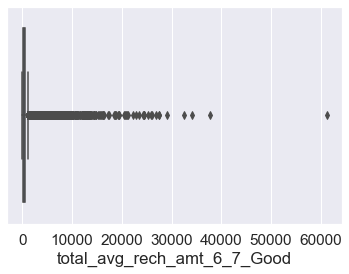

In [379]:
sns.boxplot(telecom.total_avg_rech_amt_6_7_Good)

<br>
<span style="color: orange;">
	
**Visualizing the average revenue per person for good months**

</span>
<br>

<AxesSubplot:xlabel='total_avg_arpu_6_7_Good'>

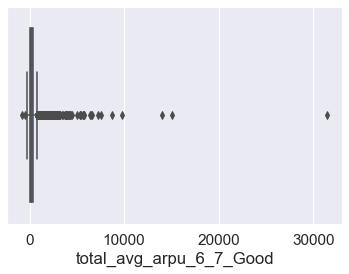

In [380]:
sns.boxplot(telecom.total_avg_arpu_6_7_Good)

<br>
<span style="color: orange;">
	
**Filter high-value customers - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

</span>
<br>

In [381]:
# HVC = High Value Customer
HVC_Criteria = telecom.total_avg_rech_amt_6_7_Good.quantile(0.7) 
HVC_Criteria

478.0



<br>
<span style="color: orange;">
	
**Our HVC value comes at INR 478, so anyone recharging more than this amount is a HVC**

</span>
<br>
<br>

In [382]:
telecom_HVC = telecom[telecom.total_avg_rech_amt_6_7_Good > HVC_Criteria]
telecom_HVC = telecom_HVC.drop(tag_features , axis=1)
print("Shape is {}".format(telecom_HVC.shape))
telecom_HVC.head()

Shape is (29953, 215)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8   arpu_9  \
0              0.0             0.0             0.0   213.803   21.100   
7              0.0             0.0             0.0  3171.480  500.000   
8              0.0             0.0             0.0   137.362  166.787   
21             0.0             0.0             0.0   637.760  578.596   
23             0.0             0.0             0.0   366.966  811.480   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  \
0           NaN          NaN         0.00          NaN           NaN  ...   
7         57.84        54.68        52.29          NaN        453.43  ...   
8        413.69       351.03        35.08        33.46         94.66  ...   
21       102.41       132.11        85.14       161.63        757.93  ...   
23        48.96        50.66        33.58        15.74         85.41  ...   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0   968       30.40        0.00      101.20        3.58   
7   802       57.74       19.38       18.74        0.00   
8   315       21.03      910.65      122.16        0.00   
21  720        0.00        0.00        0.00        0.00   
23  604       40.45       51.86        0.00        0.00   

    total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
0                   252.0                  252.0                  252.0   
7                     0.0                    0.0                    0.0   
8                     0.0                  354.0                  207.0   
21                    0.0                    0.0                    0.0   
23                    0.0                  712.0                  540.0   

    total_avg_rech_amt_6_7_Good  total_avg_arpu_6_7_Good  
0                         559.0                 206.1005  
7                        1185.0                1209.5150  
8                         696.0                 435.4720  
21                        640.0                 556.1030  
23                        583.0                 134.1235  

[5 rows x 215 columns]


<span style="color: orange;">

**So, the shape is around $29.9k$ thus meeting the problem criterion**


</span>
<br>

**churner_labels => ['total_ic_mou_9',
                'total_og_mou_9',
                'vol_2g_mb_9',
                'vol_3g_mb_9']**

<br>
<span style="color: orange;">
	
**Checking if incoming/outgoing call minutes and data consumption is zero, and if yes then storing in a series**

</span>
<br>

In [383]:
churn_status=(telecom_HVC.total_ic_mou_9 + telecom_HVC.total_og_mou_9 == 0) & \
                (telecom_HVC.vol_2g_mb_9 + telecom_HVC.vol_3g_mb_9 ==0) 

In [384]:
telecom_HVC['Churned'] = churn_status.astype('int')

In [385]:
telecom_HVC.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8   arpu_9  \
0              0.0             0.0             0.0   213.803   21.100   
7              0.0             0.0             0.0  3171.480  500.000   
8              0.0             0.0             0.0   137.362  166.787   
21             0.0             0.0             0.0   637.760  578.596   
23             0.0             0.0             0.0   366.966  811.480   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  \
0           NaN          NaN         0.00          NaN           NaN  ...   
7         57.84        54.68        52.29          NaN        453.43  ...   
8        413.69       351.03        35.08        33.46         94.66  ...   
21       102.41       132.11        85.14       161.63        757.93  ...   
23        48.96        50.66        33.58        15.74         85.41  ...   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_data_6  \
0        30.40        0.00      101.20        3.58                  252.0   
7        57.74       19.38       18.74        0.00                    0.0   
8        21.03      910.65      122.16        0.00                    0.0   
21        0.00        0.00        0.00        0.00                    0.0   
23       40.45       51.86        0.00        0.00                    0.0   

    total_rech_amt_data_7  total_rech_amt_data_8  total_avg_rech_amt_6_7_Good  \
0                   252.0                  252.0                        559.0   
7                     0.0                    0.0                       1185.0   
8                   354.0                  207.0                        696.0   
21                    0.0                    0.0                        640.0   
23                  712.0                  540.0                        583.0   

    total_avg_arpu_6_7_Good  Churned  
0                  206.1005        1  
7                 1209.5150        1  
8                  435.4720        0  
21                 556.1030        0  
23                 134.1235        0  

[5 rows x 216 columns]

<br>
<span style="color: orange;">

**So based on usage we have labeled customers as churned or not and then converting the boolean array to integer datatype**


</span>
<br>


<br>
<span style="color: orange;">
	
**Observations**

</span>
<br>

     ○ We have tagged the HVC customer with churn or not based on usage.

<br>
<br>
<span style="color: orange;">
	
**Droping all the features having the ending with '_9' for september month** 

</span>
<br>

In [386]:
telecom_HVC = telecom_HVC.drop(GetFeatureNames('_9', telecom_HVC), axis= 1)
telecom_HVC.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_6  \
0              0.0             0.0             0.0   213.803          NaN   
7              0.0             0.0             0.0  3171.480        57.84   
8              0.0             0.0             0.0   137.362       413.69   
21             0.0             0.0             0.0   637.760       102.41   
23             0.0             0.0             0.0   366.966        48.96   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  \
0           NaN         0.00           NaN           NaN          0.00  ...   
7         54.68        52.29        453.43        567.16        325.91  ...   
8        351.03        35.08         94.66         80.63        136.48  ...   
21       132.11        85.14        757.93        896.68        983.39  ...   
23        50.66        33.58         85.41         89.36        205.89  ...   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_data_6  \
0        30.40        0.00      101.20        3.58                  252.0   
7        57.74       19.38       18.74        0.00                    0.0   
8        21.03      910.65      122.16        0.00                    0.0   
21        0.00        0.00        0.00        0.00                    0.0   
23       40.45       51.86        0.00        0.00                    0.0   

    total_rech_amt_data_7  total_rech_amt_data_8  total_avg_rech_amt_6_7_Good  \
0                   252.0                  252.0                        559.0   
7                     0.0                    0.0                       1185.0   
8                   354.0                  207.0                        696.0   
21                    0.0                    0.0                        640.0   
23                  712.0                  540.0                        583.0   

    total_avg_arpu_6_7_Good  Churned  
0                  206.1005        1  
7                 1209.5150        1  
8                  435.4720        0  
21                 556.1030        0  
23                 134.1235        0  

[5 rows x 165 columns]

In [387]:
og_features = GetFeatureNames('.*_og|og', telecom_HVC)
og_features 


array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8'], dtype=object)

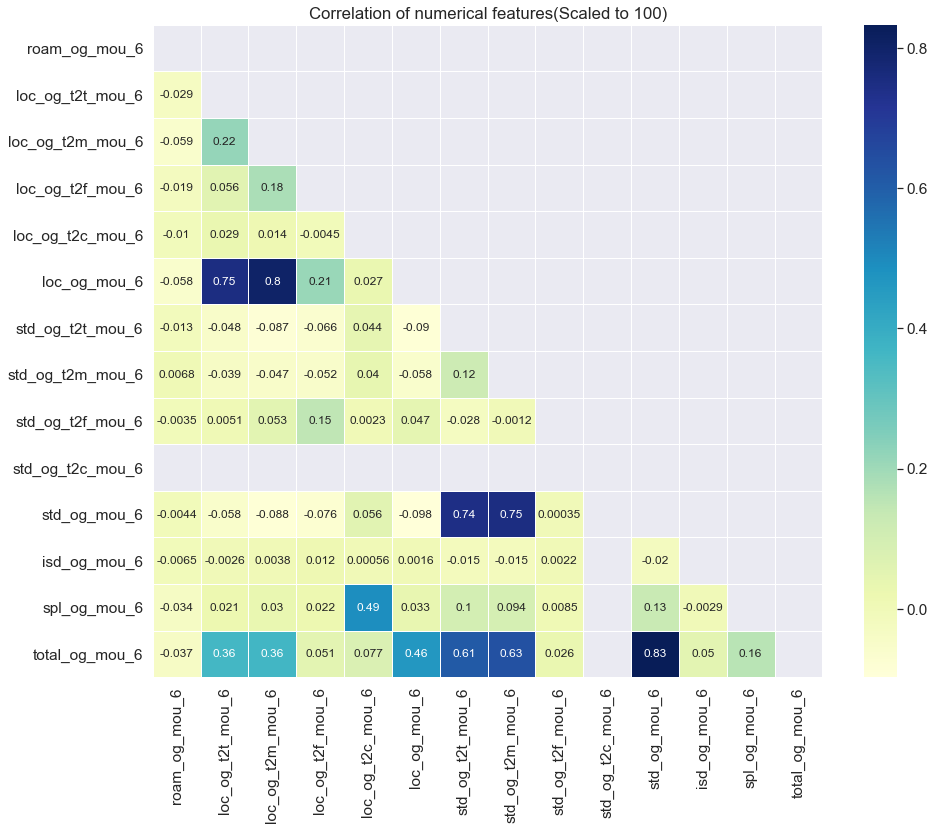

In [388]:
corr_mat = telecom_HVC[GetFeatureNames('.*_og_.*mou_6', telecom_HVC)].corr()
plt.show()

plt.figure(figsize=[15,12])
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, cmap="YlGnBu", mask=mask,annot=True,linewidths=.5 , 
            annot_kws={"size": 12})
plt.title("Correlation of numerical features(Scaled to 100)")
plt.show()

<br>
<span style="color: orange;">
	
**Observations**

    • There is high correlation between local, std & isd outgoing minutes with total og minutes.

    • We need to verify analytically this correlation.

</span>
<br>

In [389]:

for month in prev_months:

    print(" OG Minutes for {}th month : Total = {} and combined = {}".format(month, telecom_HVC.loc[48,'total_og_mou_'+month],  
                                            telecom_HVC.loc[48, ['loc_og_mou_'+month,
                                                            'std_og_mou_'+month,
                                                            'spl_og_mou_'+month,
                                                            'isd_og_mou_'+month,
                                                            'og_others_'+month]].sum()))


 OG Minutes for 6th month : Total = 3152.43 and combined = 3152.4199999999996
 OG Minutes for 7th month : Total = 1140.66 and combined = 1140.6499999999999
 OG Minutes for 8th month : Total = 225.09 and combined = 225.07999999999998


In [390]:
telecom_HVC.loc[:,['loc_og_t2o_mou'	,'std_og_t2o_mou']].sum()

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
dtype: float64


<br>
<span style="color: orange;">
	
**Observations**

Hence, 'total_og_mou_' is a combination of all of call minutes thus we can delete others and only keep total values

Also, loc_og_t2o_mou	std_og_t2o_mou	loc_ic_t2o_mou have all zeros thus we can delete them.


</span>
<br>

In [391]:
for month in prev_months:
    og_features = DeleteFromNpArray(og_features,['total_og_mou_'+month] )

og_features   
    

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8'], dtype=object)

In [392]:
telecom_HVC = telecom_HVC.drop(og_features, axis =1)
telecom_HVC.shape

(29953, 121)

In [393]:
ic_features = GetFeatureNames('.*_ic|ic', telecom_HVC)
ic_features

array(['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8'], dtype=object)

In [394]:

for month in prev_months:

    print(" IC Minutes for {}th month : Total = {} and combined = {}".format(month, telecom_HVC.loc[48,'total_ic_mou_'+month],  
                                            telecom_HVC.loc[48, ['loc_ic_mou_'+month,
                                                                'std_ic_mou_'+month,
                                                                'spl_ic_mou_'+month,
                                                                'isd_ic_mou_'+month,
                                                                'ic_others_'+month]].sum()))


 IC Minutes for 6th month : Total = 1250.56 and combined = 1250.5500000000002
 IC Minutes for 7th month : Total = 516.43 and combined = 516.42
 IC Minutes for 8th month : Total = 171.14 and combined = 171.14


In [395]:
telecom_HVC.loc[:,['loc_ic_t2o_mou']].sum()

loc_ic_t2o_mou    0.0
dtype: float64


<br>
<span style="color: orange;">
	
**Observations**

Hence, 'total_ic_mou_*month*' is a combination of all of call minutes thus we can delete others and only keep total values

Also,loc_ic_t2o_mou have all zeros thus we can delete it.


</span>
<br>

In [396]:
for month in prev_months:
    ic_features = DeleteFromNpArray(ic_features,['total_ic_mou_'+month] )

ic_features   

array(['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'],
      dtype=object)

In [397]:
telecom_HVC = telecom_HVC.drop(ic_features, axis = 1)
telecom_HVC.shape

(29953, 81)

In [398]:

telecom_HVC['total_avg_og_mou_6_7_Good'] = (telecom_HVC.total_og_mou_6+ telecom_HVC.total_og_mou_7)/ 2
telecom_HVC['total_avg_ic_mou_6_7_Good'] = (telecom_HVC.total_ic_mou_6+ telecom_HVC.total_ic_mou_7)/ 2

telecom_HVC= telecom_HVC.drop(['total_og_mou_6', 'total_og_mou_7','total_ic_mou_6', 'total_ic_mou_7' ], axis = 1)
telecom_HVC.shape

(29953, 79)

In [399]:
internet_features = GetFeatureNames('2g|3g', telecom_HVC)
internet_features

array(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype=object)

In [400]:
GetNulls(telecom_HVC[internet_features])

LabelNullCount  NullPercent
count_rech_2g_6               0          0.0
monthly_3g_7                  0          0.0
monthly_2g_7                  0          0.0
monthly_2g_8                  0          0.0
sachet_2g_6                   0          0.0
sachet_2g_7                   0          0.0
sachet_2g_8                   0          0.0
monthly_3g_6                  0          0.0
monthly_3g_8                  0          0.0
count_rech_2g_7               0          0.0
sachet_3g_6                   0          0.0
sachet_3g_7                   0          0.0
sachet_3g_8                   0          0.0
aug_vbc_3g                    0          0.0
jul_vbc_3g                    0          0.0
jun_vbc_3g                    0          0.0
monthly_2g_6                  0          0.0
arpu_2g_8                     0          0.0
arpu_2g_7                     0          0.0
arpu_2g_6                     0          0.0
arpu_3g_8                     0          0.0
arpu_3g_7                     0          0.0
arpu_3g_6                     0          0.0
vol_3g_mb_8                   0          0.0
vol_3g_mb_7                   0          0.0
vol_3g_mb_6                   0          0.0
vol_2g_mb_8                   0          0.0
vol_2g_mb_7                   0          0.0
vol_2g_mb_6                   0          0.0
count_rech_3g_8               0          0.0
count_rech_3g_7               0          0.0
count_rech_3g_6               0          0.0
count_rech_2g_8               0          0.0
sep_vbc_3g                    0          0.0



<br>
<span style="color: orange;">
	
**Observation**

We have some redundant features here like - count_rech_'type'g_'month'& arpu_'type'g_'month' which are well concluded by volume and VBC , so we can delete them

</span>
<br>

In [401]:
telecom_HVC.drop(['count_rech_2g_6','count_rech_2g_7',
                  'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

telecom_HVC.shape

(29953, 67)

In [402]:

telecom_HVC['total_avg_vol_2g_mb_6_7_Good'] = (telecom_HVC.vol_2g_mb_6+ telecom_HVC.vol_2g_mb_7)/ 2
telecom_HVC['total_avg_vol_3g_mb_6_7_Good'] = (telecom_HVC.vol_3g_mb_6+ telecom_HVC.vol_3g_mb_7)/ 2
telecom_HVC['total_avg_vbc_3g_6_7_Good'] = (telecom_HVC.jun_vbc_3g + telecom_HVC.jul_vbc_3g)/2


telecom_HVC.drop(['vol_2g_mb_6', 
                 'vol_2g_mb_7',
                 'vol_3g_mb_6', 
                 'vol_3g_mb_7', 
                 'jun_vbc_3g' , 
                 'jul_vbc_3g' ], inplace=True, axis=1)
telecom_HVC.shape

(29953, 64)

In [403]:
other_features = GetFeatureNames('_mou|monthly_2g|monthly_3g|sachet_2g|sachet_3g', telecom_HVC)
other_features

array(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'total_avg_og_mou_6_7_Good', 'total_avg_ic_mou_6_7_Good'],
      dtype=object)

In [404]:
_BData = GetNulls(telecom_HVC[other_features])
_BData

LabelNullCount  NullPercent
onnet_mou_8                          1172         3.91
offnet_mou_8                         1172         3.91
onnet_mou_6                           542         1.81
offnet_mou_6                          542         1.81
offnet_mou_7                          536         1.79
onnet_mou_7                           536         1.79
monthly_3g_6                            0         0.00
total_avg_og_mou_6_7_Good               0         0.00
sachet_3g_8                             0         0.00
sachet_3g_7                             0         0.00
sachet_3g_6                             0         0.00
monthly_3g_8                            0         0.00
monthly_3g_7                            0         0.00
sachet_2g_6                             0         0.00
sachet_2g_8                             0         0.00
sachet_2g_7                             0         0.00
monthly_2g_8                            0         0.00
monthly_2g_7                            0         0.00
monthly_2g_6                            0         0.00
total_ic_mou_8                          0         0.00
total_og_mou_8                          0         0.00
total_avg_ic_mou_6_7_Good               0         0.00

In [405]:
_BFeatures = _BData[_BData.NullPercent > 0.0].index.values
telecom_HVC[_BFeatures].describe()

onnet_mou_8  offnet_mou_8   onnet_mou_6  offnet_mou_6  offnet_mou_7  \
count  28781.000000  28781.000000  29411.000000  29411.000000  29417.000000   
mean     243.888097    348.769656    265.708886    380.688975    385.124799   
std      465.505577    486.836956    462.692744    484.441095    501.024091   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       14.280000     58.760000     19.250000     78.550000     76.180000   
50%       72.990000    197.690000     88.140000    229.630000    227.130000   
75%      255.310000    455.440000    297.490000    494.755000    500.480000   
max    10752.560000  14007.340000   7376.710000   8362.360000   9667.130000   

        onnet_mou_7  
count  29417.000000  
mean     272.935850  
std      483.282132  
min        0.000000  
25%       18.180000  
50%       86.890000  
75%      298.380000  
max     8157.780000

<br>
<span style="color: orange;">

**Observations**	

    • So, if offnet/onnet calls are not present then it might happen that the customers are not talking hence they can be imputed with zero.


</span>
<br>

In [406]:
telecom_HVC[_BFeatures] =  telecom_HVC[_BFeatures].apply(lambda x: x.fillna(0))

In [407]:
telecom_HVC.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803         0.00         0.00         0.00          0.00   
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
21   637.760       102.41       132.11        85.14        757.93   
23   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  total_og_mou_8  total_ic_mou_8  \
0           0.00          0.00            0.00            5.44   
7         567.16        325.91          350.16          428.74   
8          80.63        136.48          171.56           16.54   
21        896.68        983.39         1068.54          261.04   
23         89.36        205.89          239.48          298.33   

    total_rech_num_6  ...  total_rech_amt_data_7  total_rech_amt_data_8  \
0                  4  ...                  252.0                  252.0   
7                  5  ...                    0.0                    0.0   
8                 19  ...                  354.0                  207.0   
21                22  ...                    0.0                    0.0   
23                 3  ...                  712.0                  540.0   

    total_avg_rech_amt_6_7_Good  total_avg_arpu_6_7_Good  Churned  \
0                         559.0                 206.1005        1   
7                        1185.0                1209.5150        1   
8                         696.0                 435.4720        0   
21                        640.0                 556.1030        0   
23                        583.0                 134.1235        0   

    total_avg_og_mou_6_7_Good  total_avg_ic_mou_6_7_Good  \
0                       0.000                      0.000   
7                     548.385                    592.250   
8                     470.010                     66.175   
21                    944.565                    169.490   
23                    137.210                    171.235   

    total_avg_vol_2g_mb_6_7_Good  total_avg_vol_3g_mb_6_7_Good  \
0                         15.725                       117.165   
7                          0.000                         0.000   
8                        178.000                       375.475   
21                         0.000                         0.000   
23                         0.240                       299.545   

    total_avg_vbc_3g_6_7_Good  
0                      50.600  
7                      19.060  
8                     516.405  
21                      0.000  
23                     25.930  

[5 rows x 64 columns]

In [408]:
_BData = GetNulls(telecom_HVC[categorical_features])
_BData

LabelNullCount  NullPercent
night_pck_user_8           14018        46.80
fb_user_8                  14018        46.80
night_pck_user_6           13213        44.11
fb_user_6                  13213        44.11
night_pck_user_7           12915        43.12
fb_user_7                  12915        43.12
monthly_3g_7                   0         0.00
monthly_3g_6                   0         0.00
monthly_3g_8                   0         0.00
monthly_2g_7                   0         0.00
monthly_2g_6                   0         0.00
monthly_2g_8                   0         0.00

In [409]:
telecom_HVC[_BData[_BData.NullPercent > 0.0].index.values].describe()

night_pck_user_8     fb_user_8  night_pck_user_6     fb_user_6  \
count      15935.000000  15935.000000      16740.000000  16740.000000   
mean           0.021399      0.897207          0.024313      0.926583   
std            0.144716      0.303697          0.154024      0.260827   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000      1.000000          0.000000      1.000000   
50%            0.000000      1.000000          0.000000      1.000000   
75%            0.000000      1.000000          0.000000      1.000000   
max            1.000000      1.000000          1.000000      1.000000   

       night_pck_user_7     fb_user_7  
count      17038.000000  17038.000000  
mean           0.022010      0.921763  
std            0.146719      0.268552  
min            0.000000      0.000000  
25%            0.000000      1.000000  
50%            0.000000      1.000000  
75%            0.000000      1.000000  
max            1.000000      1.000000

<br>
<span style="color: orange;">
	
**Observations**

    • Since, having no data in the featres required to be handled by imputing them with a new level called '-1' which means no data.


</span>
<br>

In [410]:
telecom_HVC[categorical_features ] = telecom_HVC[categorical_features].apply(lambda x : x.fillna(-1))

In [411]:
count_register = 0
def GetFrequencyPercentage(Dataframe, FeatureName):
    """Get the frequency % of value counts the different levels of a categorical variable in a dataframe.

    Dataframe : The master datframe whose data need to analysed.

    FeatureName : Feature whose value counts need to fetched.
    
    """
    global count_register
    val_counts = Dataframe[FeatureName].value_counts()
    count_register += len(val_counts.values)
    return val_counts/len(Dataframe)*100

In [412]:
def ShowCategoricalValueCounts(Dataframe, CategoricalFeatures):
        """Display the frequency % of value counts the different levels of  categorical variables in a dataframe.

        Dataframe : The master datframe whose data need to analysed.

        CategoricalFeatures : Features whose value counts need to fetched.
    
        """
        for feature_name in CategoricalFeatures:
            print(" |{}|\t|Frequency Percentage| \n {} \n".format(feature_name, GetFrequencyPercentage(Dataframe, feature_name)))

In [413]:
ShowCategoricalValueCounts(telecom_HVC, categorical_features)

 |night_pck_user_6|	|Frequency Percentage| 
  0.0    54.528762
-1.0    44.112443
 1.0     1.358795
Name: night_pck_user_6, dtype: float64 

 |night_pck_user_7|	|Frequency Percentage| 
  0.0    55.630488
-1.0    43.117551
 1.0     1.251961
Name: night_pck_user_7, dtype: float64 

 |night_pck_user_8|	|Frequency Percentage| 
  0.0    52.061563
-1.0    46.799987
 1.0     1.138450
Name: night_pck_user_8, dtype: float64 

 |fb_user_6|	|Frequency Percentage| 
  1.0    51.784462
-1.0    44.112443
 0.0     4.103095
Name: fb_user_6, dtype: float64 

 |fb_user_7|	|Frequency Percentage| 
  1.0    52.432144
-1.0    43.117551
 0.0     4.450305
Name: fb_user_7, dtype: float64 

 |fb_user_8|	|Frequency Percentage| 
  1.0    47.731446
-1.0    46.799987
 0.0     5.468567
Name: fb_user_8, dtype: float64 

 |monthly_3g_7|	|Frequency Percentage| 
 0     84.328782
1     10.993890
2      3.361934
3      0.757854
4      0.247054
5      0.140220
6      0.086803
7      0.033386
8      0.016693
9      0.013354
1

In [414]:
print("Total number of categorical levels in {} categorical features is {}".format(len(categorical_features), count_register))
count_register = 0

Total number of categorical levels in 12 categorical features is 74


In [415]:
def GetFilteredLabelName(index, values, label, cut_off ):
    """Filters the levels on the basis of the cut-off comaparing it with each level's qunatity %.

    index : Feature name whose value counts need to analysed.

    values : Quantity % of each feature's levels.

    label : Its the label with which we are comparing the present feature name.

    cut_off :  
               label_name = label  if values => cut_off

               label_name = Others  if values < cut_off
    
    """
    ClassName = np.nan
    i = 0
    for i in range(len(values)):
        if index[i] == label:
            if values[i] < cut_off:
                ClassName = 100
            else:
                ClassName = label
            return ClassName

**Iterating through all the categorical features to change the levels based on the set cut-off**

* Cut-off = 5%

    * So, if the value count % is  > than cut off, the level rertains its level name.
    
    * Otherwise it iwll given name as *-1*.

In [416]:
for feature_name in telecom_HVC[categorical_features]:
    value_counts = telecom_HVC[feature_name].value_counts()
    values = value_counts.values.reshape(-1,1)/len(telecom_HVC)*100
    index = value_counts.index.values.reshape(-1,1)
    telecom_HVC[feature_name] = telecom_HVC[feature_name].apply(lambda x: GetFilteredLabelName( index, values, x, 5) )

In [417]:
ShowCategoricalValueCounts(telecom_HVC,categorical_features)

 |night_pck_user_6|	|Frequency Percentage| 
  0.0      54.528762
-1.0      44.112443
 100.0     1.358795
Name: night_pck_user_6, dtype: float64 

 |night_pck_user_7|	|Frequency Percentage| 
  0.0      55.630488
-1.0      43.117551
 100.0     1.251961
Name: night_pck_user_7, dtype: float64 

 |night_pck_user_8|	|Frequency Percentage| 
  0.0      52.061563
-1.0      46.799987
 100.0     1.138450
Name: night_pck_user_8, dtype: float64 

 |fb_user_6|	|Frequency Percentage| 
  1.0      51.784462
-1.0      44.112443
 100.0     4.103095
Name: fb_user_6, dtype: float64 

 |fb_user_7|	|Frequency Percentage| 
  1.0      52.432144
-1.0      43.117551
 100.0     4.450305
Name: fb_user_7, dtype: float64 

 |fb_user_8|	|Frequency Percentage| 
  1.0    47.731446
-1.0    46.799987
 0.0     5.468567
Name: fb_user_8, dtype: float64 

 |monthly_3g_7|	|Frequency Percentage| 
 0      84.328782
1      10.993890
100     4.677328
Name: monthly_3g_7, dtype: float64 

 |monthly_3g_6|	|Frequency Percentage| 
 0 

In [418]:
print("Total number of categorical levels in {} categorical features is {}".format(len(categorical_features), count_register))
count_register = 0

Total number of categorical levels in 12 categorical features is 36




<br>
<span style="color: orange;">
	
**Observation**

</span>
<br>

    ○   With a cut-off only 5%, we get are able to lower the levels from 74 to 36 in the categorical features which is a reduction of almost 51%.

    ○   So any thing whose level quantity is more than cut-off % of total data qunatity, will be preseved with orginal name, whereas if any quantities which are 5% will be allotted to '-1' category.

In [419]:
telecom_HVC.isnull().sum().sum()

0

In [420]:
telecom_HVC.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803         0.00         0.00         0.00          0.00   
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
21   637.760       102.41       132.11        85.14        757.93   
23   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  total_og_mou_8  total_ic_mou_8  \
0           0.00          0.00            0.00            5.44   
7         567.16        325.91          350.16          428.74   
8          80.63        136.48          171.56           16.54   
21        896.68        983.39         1068.54          261.04   
23         89.36        205.89          239.48          298.33   

    total_rech_num_6  ...  total_rech_amt_data_7  total_rech_amt_data_8  \
0                  4  ...                  252.0                  252.0   
7                  5  ...                    0.0                    0.0   
8                 19  ...                  354.0                  207.0   
21                22  ...                    0.0                    0.0   
23                 3  ...                  712.0                  540.0   

    total_avg_rech_amt_6_7_Good  total_avg_arpu_6_7_Good  Churned  \
0                         559.0                 206.1005        1   
7                        1185.0                1209.5150        1   
8                         696.0                 435.4720        0   
21                        640.0                 556.1030        0   
23                        583.0                 134.1235        0   

    total_avg_og_mou_6_7_Good  total_avg_ic_mou_6_7_Good  \
0                       0.000                      0.000   
7                     548.385                    592.250   
8                     470.010                     66.175   
21                    944.565                    169.490   
23                    137.210                    171.235   

    total_avg_vol_2g_mb_6_7_Good  total_avg_vol_3g_mb_6_7_Good  \
0                         15.725                       117.165   
7                          0.000                         0.000   
8                        178.000                       375.475   
21                         0.000                         0.000   
23                         0.240                       299.545   

    total_avg_vbc_3g_6_7_Good  
0                      50.600  
7                      19.060  
8                     516.405  
21                      0.000  
23                     25.930  

[5 rows x 64 columns]


<span style="color: yellow;">

# 3. Visualization	
</span>
<br>

<br>
<span style="color: orange;">
	
**Monthly data consumption wrt to churned**


</span>
<br>

In [421]:
def PlotAttributeBoxChart(attribute1, attribute2 ):
    """[this function ]

    Args:
        attribute1 (str): [1st attribute wrt which we are trying to see the trend for churning for june, july and august]
        attribute2 (str): [2nd attribute wrt which we are trying to see the trend for churning for june, july and august]
    """
 
    for month in prev_months:
        plt.figure(figsize=(12,4))  
        plt.subplot(1,2,1)
        sns.boxplot(data=telecom_HVC, y=attribute1+"_"+month ,x="Churned",hue="Churned",showfliers=False,palette=("plasma"))
        plt.title("RECHARGE - {} vs Churned". format(attribute1+"_"+month))

        plt.subplot(1,2,2)
        sns.boxplot(data=telecom_HVC, y=attribute2+"_"+month ,x="Churned",hue="Churned",showfliers=False,palette=("plasma"))
        plt.title("DATA - {} vs Churned". format(attribute2+"_"+month))

        plt.show()      
            
            

<br>
<span style="color: orange;">
	
**Analysis of data and normal recharges of HVC wrt churning during good and action phases**


</span>
<br>

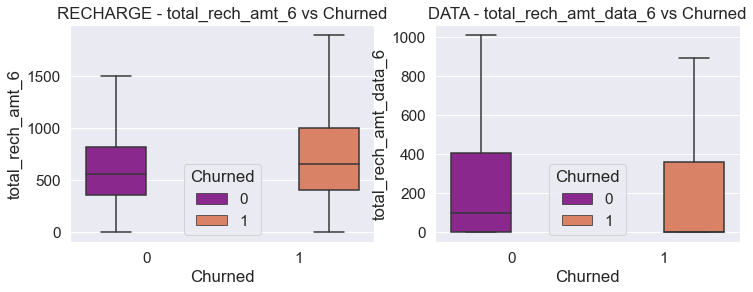

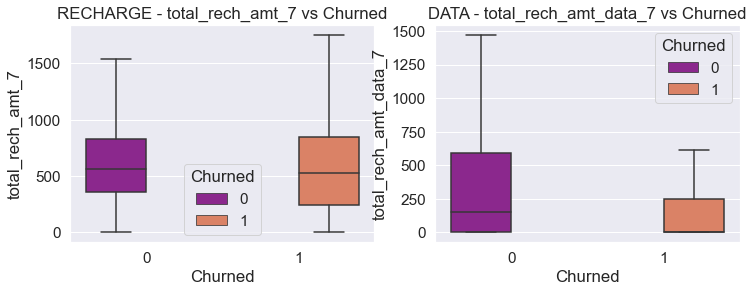

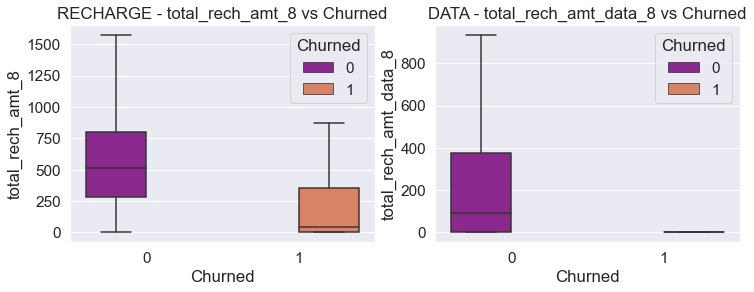

In [422]:
PlotAttributeBoxChart('total_rech_amt', 'total_rech_amt_data')

In [423]:
def DisplayBarhPlot(Features, DataFrame):
    """[summary]

    Args:
        Features ([type]): [description]
        DataFrame ([type]): [description]

    Returns:
        [type]: [description]
    """
    DataFrame.pivot_table( values=Features,index = 'Churned', aggfunc = np.mean ).plot.barh()
    plt.title("{} wrt Churned".format(Features))
    plt.show()


In [424]:
display_vars = [['total_avg_arpu_6_7_Good','arpu_8'],
                ['total_avg_og_mou_6_7_Good','total_og_mou_8'] ,
                ['total_avg_ic_mou_6_7_Good','total_ic_mou_8'],
                ['total_avg_vol_2g_mb_6_7_Good','vol_2g_mb_8'],
                ['total_avg_vol_3g_mb_6_7_Good','vol_3g_mb_8'],
                ['total_avg_vbc_3g_6_7_Good','aug_vbc_3g']]

<Figure size 216x216 with 0 Axes>

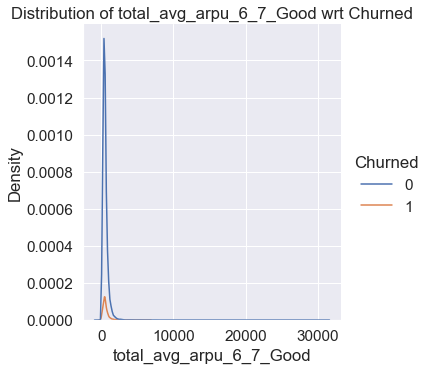

<Figure size 216x216 with 0 Axes>

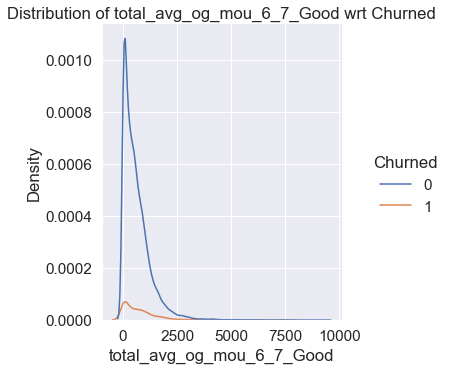

<Figure size 216x216 with 0 Axes>

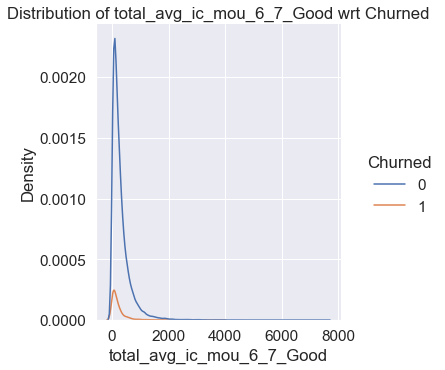

<Figure size 216x216 with 0 Axes>

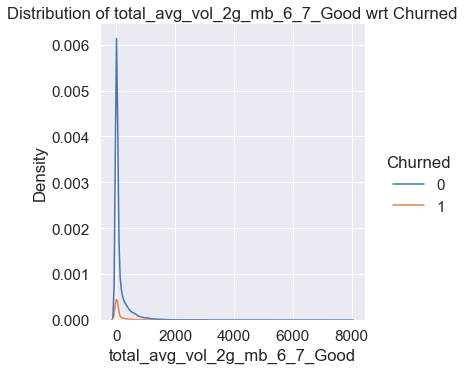

<Figure size 216x216 with 0 Axes>

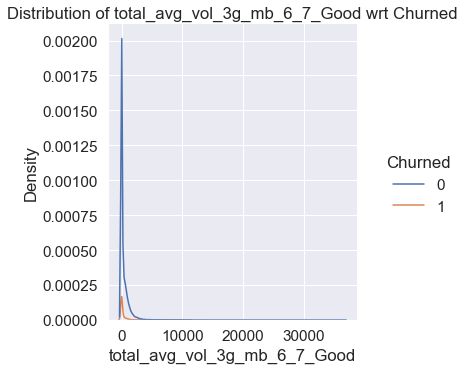

<Figure size 216x216 with 0 Axes>

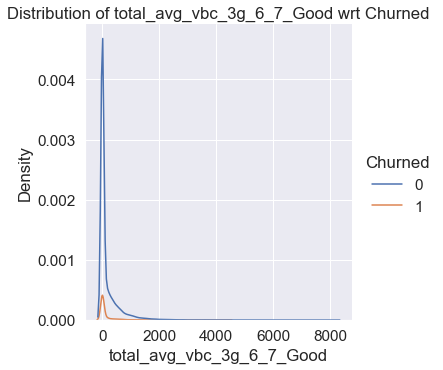

In [425]:

for var in display_vars:
    plt.figure(figsize=(3,3))
    sns.displot(data = telecom_HVC, x=var[0], hue = 'Churned',  kind="kde")
    plt.title("Distribution of {} wrt Churned".format(var[0]))
    plt.show()
  

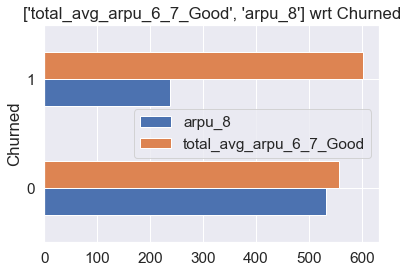

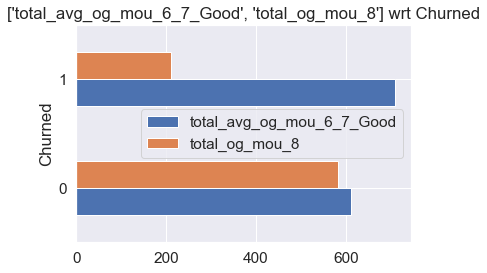

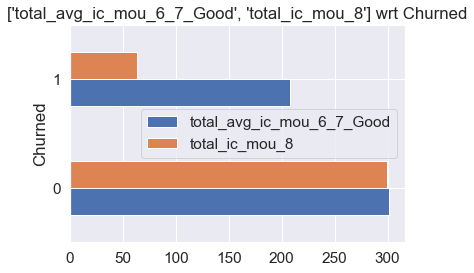

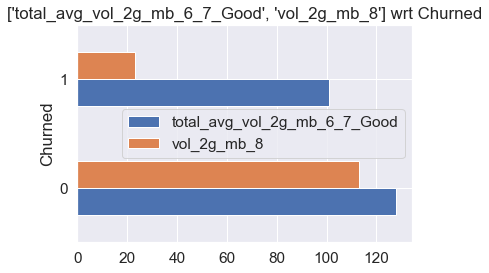

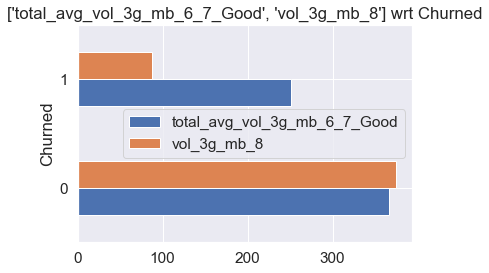

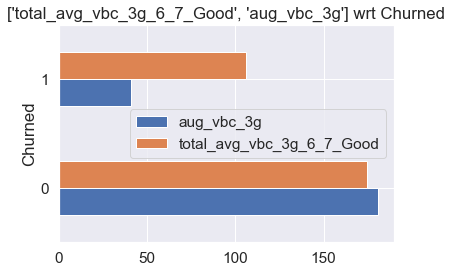

In [426]:
for var in display_vars:
    DisplayBarhPlot(var, telecom_HVC)

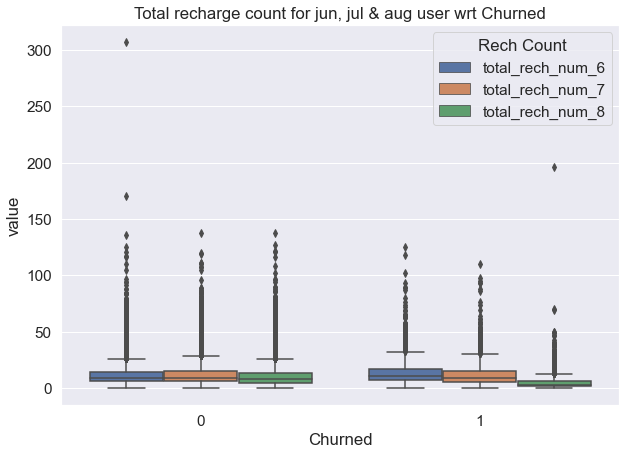

In [427]:
plt.figure(figsize=[10,7])
_BData = pd.melt(telecom_HVC, value_vars=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'], id_vars= 'Churned', var_name= 'Rech Count' )
_BData.head()
sns.boxplot(x = 'Churned', y = 'value', data= _BData, hue= 'Rech Count' )

plt.title("Total recharge count for jun, jul & aug user wrt Churned")
plt.show()

In [428]:
categorical_features 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'monthly_3g_7',
 'monthly_3g_6',
 'monthly_3g_8',
 'monthly_2g_7',
 'monthly_2g_6',
 'monthly_2g_8']

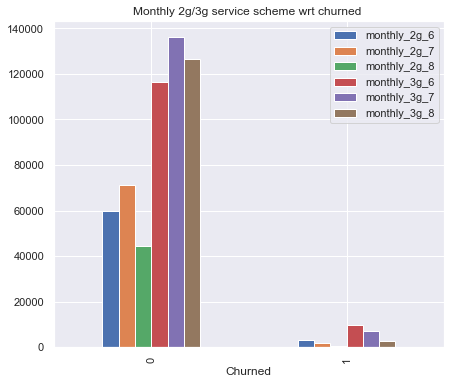

In [429]:
sns.set(rc={'figure.figsize':(7,6)})
telecom_HVC.pivot_table(values = ['monthly_3g_7','monthly_3g_6','monthly_3g_8','monthly_2g_7','monthly_2g_6','monthly_2g_8'],
                        index = "Churned"  , aggfunc = np.sum).plot.bar(grid = True, stacked = False) 

plt.title("Monthly 2g/3g service scheme wrt churned ")   
plt.show()                     

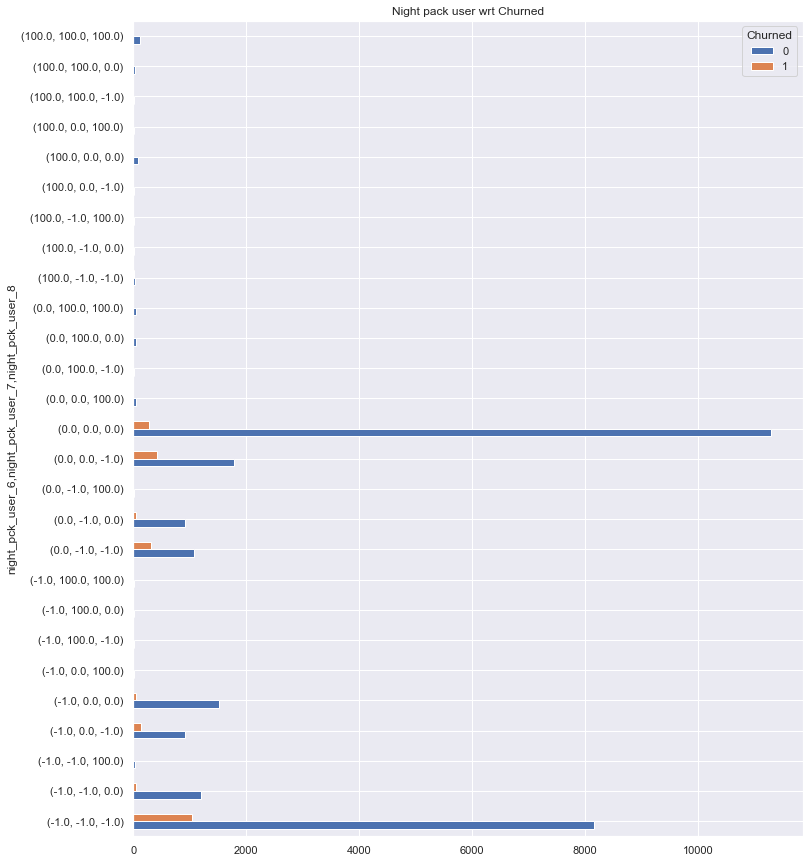

In [430]:
sns.set(rc={'figure.figsize':(12,15)})
telecom_HVC.groupby(['night_pck_user_6','night_pck_user_7','night_pck_user_8']).Churned.value_counts().unstack().plot.barh()
plt.title("Night pack user wrt Churned")
plt.show()

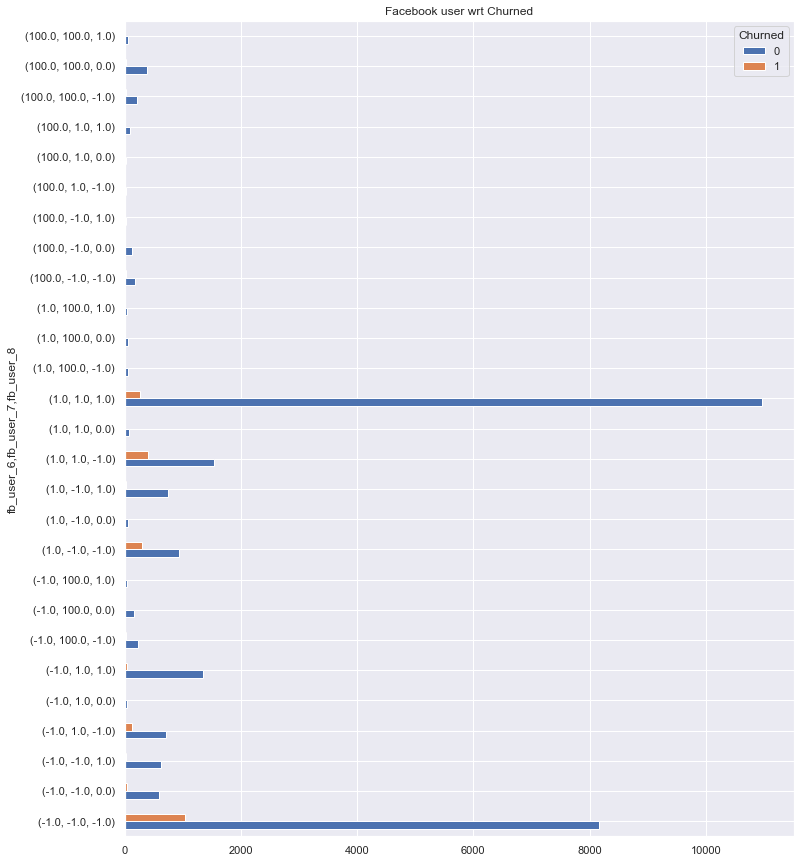

In [431]:
sns.set(rc={'figure.figsize':(12,15)})
telecom_HVC.groupby(['fb_user_6','fb_user_7','fb_user_8']).Churned.value_counts().unstack().plot.barh()
plt.title("Facebook user wrt Churned")
plt.show()

In [432]:
_BData = telecom_HVC[['aon', 'Churned']].copy()
_BData.head()

aon  Churned
0   968        1
7   802        1
8   315        0
21  720        0
23  604        0

In [433]:

_BData['age'] = pd.cut(_BData.aon/30, [0, 6, 12, 24, 60, 61], labels= ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '> 5 Yrs'])
_BData.head()

aon  Churned          age
0   968        1      2-5 Yrs
7   802        1      2-5 Yrs
8   315        0  6-12 Months
21  720        0      1-2 Yrs
23  604        0      1-2 Yrs

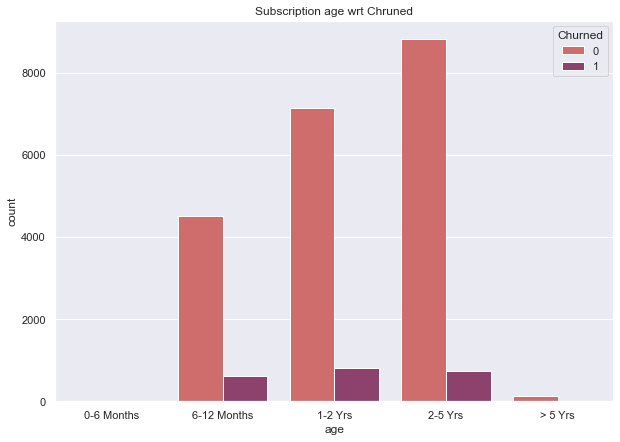

In [434]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'age', hue = 'Churned',data = _BData, palette=("flare"))
plt.title("Subscription age wrt Chruned")
plt.show()



<br>



<span style="color: yellow;">

# 4. Modelling	
</span>


<br>
<span style="color: orange;">

**Create a copy of our dataframe**
</span>
<br>

In [435]:
telecom_final = telecom_HVC.copy()

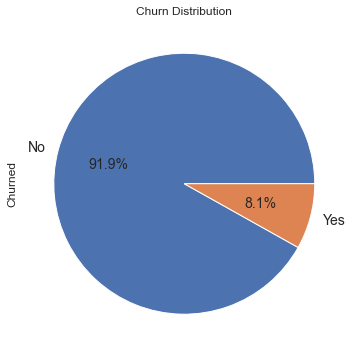

In [436]:
pie_chart = (telecom_final['Churned'].value_counts()/telecom_final.shape[0])*100.0 
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churned',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

<br>
<span style="color: orange;">
	
**8.1% of customers are likely to be churned, also it suggest a imbalanced dateset, which we will take care by oversampling**


</span>
<br>

<br>
<span style="color: orange;">
	
**Make target variable in y and independent variables in X.**


</span>
<br>

In [437]:
y = telecom_final.pop('Churned')
X = telecom_final

In [438]:
_BFeatures = X.columns.values
X.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803         0.00         0.00         0.00          0.00   
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
21   637.760       102.41       132.11        85.14        757.93   
23   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  total_og_mou_8  total_ic_mou_8  \
0           0.00          0.00            0.00            5.44   
7         567.16        325.91          350.16          428.74   
8          80.63        136.48          171.56           16.54   
21        896.68        983.39         1068.54          261.04   
23         89.36        205.89          239.48          298.33   

    total_rech_num_6  ...  total_rech_amt_data_6  total_rech_amt_data_7  \
0                  4  ...                  252.0                  252.0   
7                  5  ...                    0.0                    0.0   
8                 19  ...                    0.0                  354.0   
21                22  ...                    0.0                    0.0   
23                 3  ...                    0.0                  712.0   

    total_rech_amt_data_8  total_avg_rech_amt_6_7_Good  \
0                   252.0                        559.0   
7                     0.0                       1185.0   
8                   207.0                        696.0   
21                    0.0                        640.0   
23                  540.0                        583.0   

    total_avg_arpu_6_7_Good  total_avg_og_mou_6_7_Good  \
0                  206.1005                      0.000   
7                 1209.5150                    548.385   
8                  435.4720                    470.010   
21                 556.1030                    944.565   
23                 134.1235                    137.210   

    total_avg_ic_mou_6_7_Good  total_avg_vol_2g_mb_6_7_Good  \
0                       0.000                        15.725   
7                     592.250                         0.000   
8                      66.175                       178.000   
21                    169.490                         0.000   
23                    171.235                         0.240   

    total_avg_vol_3g_mb_6_7_Good  total_avg_vbc_3g_6_7_Good  
0                        117.165                     50.600  
7                          0.000                     19.060  
8                        375.475                    516.405  
21                         0.000                      0.000  
23                       299.545                     25.930  

[5 rows x 63 columns]

<br>
<span style="color: orange;">
	
**Scaling the data**
</span>
<br>

In [439]:
sc = StandardScaler()
X[_BFeatures] = sc.fit_transform(X[_BFeatures])
X.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  -0.587674    -0.567366    -0.558098    -0.510841     -0.774388   
7   5.302613    -0.441585    -0.444251    -0.396856      0.164965   
8  -0.739908     0.332262     0.172765    -0.434372     -0.578284   
21  0.256647    -0.344661    -0.283038    -0.325248      0.795786   
23 -0.282646    -0.460896    -0.452621    -0.437642     -0.597447   

    offnet_mou_7  offnet_mou_8  total_og_mou_8  total_ic_mou_8  \
0      -0.757784     -0.695309       -0.787825       -0.760021   
7       0.378512     -0.019115       -0.288006        0.411417   
8      -0.596243     -0.412142       -0.542940       -0.729303   
21      1.038700      1.345016        0.737410       -0.052675   
23     -0.578752     -0.268131       -0.445991        0.050521   

    total_rech_num_6  ...  total_rech_amt_data_6  total_rech_amt_data_7  \
0          -0.832975  ...              -0.143966              -0.187505   
7          -0.726915  ...              -0.321470              -0.358112   
8           0.757926  ...              -0.321470              -0.118449   
21          1.076106  ...              -0.321470              -0.358112   
23         -0.939035  ...              -0.321470               0.123922   

    total_rech_amt_data_8  total_avg_rech_amt_6_7_Good  \
0               -0.130336                    -0.437438   
7               -0.285526                     0.023022   
8               -0.158048                    -0.336666   
21              -0.285526                    -0.377858   
23               0.047025                    -0.419785   

    total_avg_arpu_6_7_Good  total_avg_og_mou_6_7_Good  \
0                 -0.822740                  -0.950049   
7                  1.510046                  -0.108912   
8                 -0.289486                  -0.229127   
21                -0.009037                   0.498766   
23                -0.990075                  -0.739590   

    total_avg_ic_mou_6_7_Good  total_avg_vol_2g_mb_6_7_Good  \
0                   -0.835895                     -0.367143   
7                    0.850658                     -0.419584   
8                   -0.647448                      0.174018   
21                  -0.353237                     -0.419584   
23                  -0.348268                     -0.418783   

    total_avg_vol_3g_mb_6_7_Good  total_avg_vbc_3g_6_7_Good  
0                      -0.286068                  -0.301013  
7                      -0.425468                  -0.381270  
8                       0.021262                   0.884275  
21                     -0.425468                  -0.429770  
23                     -0.069077                  -0.363788  

[5 rows x 63 columns]

<br>
<span style="color: orange;">
	
**Performaing PCA on our data**
</span>
<br>

In [440]:
_PCA = PCA(random_state = 42)
_PCA.fit(X)

PCA(random_state=42)

In [441]:
_PCA.components_

array([[-1.48876109e-02, -1.03534569e-01, -1.06548939e-01, ...,
         9.19784941e-02,  2.22182855e-01,  1.71694813e-01],
       [ 2.69404304e-01,  8.52311471e-02,  9.93349403e-02, ...,
        -5.65120197e-02,  1.23904038e-01,  1.08516810e-01],
       [ 1.36202831e-01,  1.15601767e-01,  1.33844956e-01, ...,
         1.64375643e-02, -4.68465440e-02, -8.07720316e-02],
       ...,
       [-1.90839380e-03,  1.14566344e-02,  2.71523526e-03, ...,
        -5.05705869e-03, -5.40213856e-03,  4.98621215e-04],
       [-3.49868068e-03, -1.03060668e-02, -1.67835639e-02, ...,
         6.32279858e-03,  1.51536545e-02, -4.70829717e-03],
       [ 1.91380084e-16,  4.66940731e-17, -1.59479700e-16, ...,
         4.85722573e-17,  3.85108612e-16, -1.24900090e-16]])

In [442]:
_PCA.explained_variance_ratio_

array([1.65037953e-01, 1.28102714e-01, 1.00704627e-01, 4.34602397e-02,
       3.80565011e-02, 3.49330046e-02, 3.32051597e-02, 2.99339363e-02,
       2.65693333e-02, 2.60586287e-02, 2.32264018e-02, 2.27584105e-02,
       2.01554099e-02, 1.87358362e-02, 1.77628013e-02, 1.57217703e-02,
       1.52816473e-02, 1.47511833e-02, 1.45871624e-02, 1.37986158e-02,
       1.37135771e-02, 1.30288299e-02, 1.28157833e-02, 1.17221170e-02,
       1.08225278e-02, 1.00039436e-02, 9.78392497e-03, 9.21787517e-03,
       7.84601825e-03, 7.40222266e-03, 7.13843232e-03, 6.74854969e-03,
       6.57455909e-03, 6.28019832e-03, 5.72255159e-03, 5.37618088e-03,
       5.33196848e-03, 4.95587967e-03, 4.29598474e-03, 3.96903617e-03,
       3.85768282e-03, 3.69952505e-03, 3.58228790e-03, 3.00456852e-03,
       2.90054631e-03, 2.74284204e-03, 2.37096281e-03, 2.17351594e-03,
       1.91350539e-03, 1.53670274e-03, 1.45733651e-03, 1.32920573e-03,
       1.10325685e-03, 6.83754453e-04, 5.61776785e-04, 4.68426261e-04,
      

Text(0.5, 1.0, 'Feature Counts wrt PCA explained variance ratio')

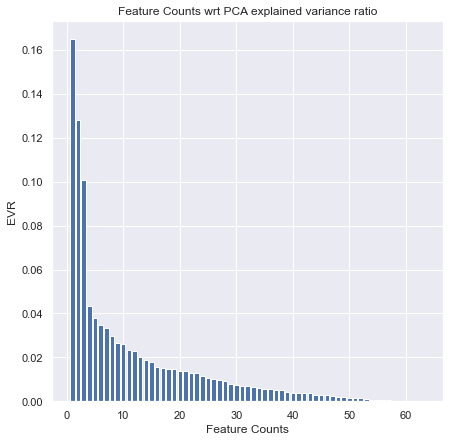

In [443]:
plt.figure(figsize = [7,7])
plt.bar(range(1,len(_PCA.explained_variance_ratio_)+1), _PCA.explained_variance_ratio_)
plt.xlabel('Feature Counts')
plt.ylabel('EVR')
plt.title("Feature Counts wrt PCA explained variance ratio")

In [444]:
var_cumu = np.cumsum(np.round(_PCA.explained_variance_ratio_, decimals = 4))*100
var_cumu

array([ 16.5 ,  29.31,  39.38,  43.73,  47.54,  51.03,  54.35,  57.34,
        60.  ,  62.61,  64.93,  67.21,  69.23,  71.1 ,  72.88,  74.45,
        75.98,  77.46,  78.92,  80.3 ,  81.67,  82.97,  84.25,  85.42,
        86.5 ,  87.5 ,  88.48,  89.4 ,  90.18,  90.92,  91.63,  92.3 ,
        92.96,  93.59,  94.16,  94.7 ,  95.23,  95.73,  96.16,  96.56,
        96.95,  97.32,  97.68,  97.98,  98.27,  98.54,  98.78,  99.  ,
        99.19,  99.34,  99.49,  99.62,  99.73,  99.8 ,  99.86,  99.91,
        99.95,  99.98, 100.  , 100.01, 100.02, 100.03, 100.03])

<br>
<span style="color: orange;">
	
**Checking for the number of components required**
</span>
<br>

In [445]:
np.sum(var_cumu  <= 95.00)

36

Text(0.5, 1.0, 'Feature Counts vs Cumulative explaination %')

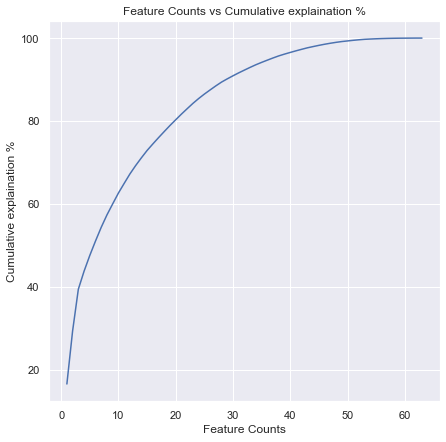

In [446]:
plt.figure(figsize = [7,7])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Feature Counts')
plt.ylabel('Cumulative explaination %')
plt.title("Feature Counts vs Cumulative explaination %")

In [447]:
_PCA2 = PCA(n_components=36, random_state=42)

In [448]:
telecom_final_PCA = _PCA2.fit_transform(X)

In [449]:
_BData = pd.DataFrame(telecom_final_PCA, columns=(["PCA-"+str(i+1) for i in range(telecom_final_PCA.shape[1])])).head()

In [450]:
pd.DataFrame(_BData, y).head()

PCA-1     PCA-2     PCA-3     PCA-4     PCA-5     PCA-6     PCA-7  \
Churned                                                                         
1       -1.620127  7.947803 -1.184545  7.417388  1.149852  2.469753 -0.008562   
1       -1.620127  7.947803 -1.184545  7.417388  1.149852  2.469753 -0.008562   
0        1.550402 -0.277473 -3.601270  0.743371  0.319981  0.980464  0.013561   
0        1.550402 -0.277473 -3.601270  0.743371  0.319981  0.980464  0.013561   
0        1.550402 -0.277473 -3.601270  0.743371  0.319981  0.980464  0.013561   

            PCA-8     PCA-9    PCA-10  ...    PCA-27    PCA-28    PCA-29  \
Churned                                ...                                 
1       -0.627680  1.022012  1.424889  ...  0.870458 -0.009554 -0.103283   
1       -0.627680  1.022012  1.424889  ...  0.870458 -0.009554 -0.103283   
0       -0.183741  0.832083 -0.410906  ... -0.084006 -0.055059 -0.052462   
0       -0.183741  0.832083 -0.410906  ... -0.084006 -0.055059 -0.052462   
0       -0.183741  0.832083 -0.410906  ... -0.084006 -0.055059 -0.052462   

           PCA-30    PCA-31    PCA-32    PCA-33    PCA-34    PCA-35    PCA-36  
Churned                                                                        
1       -0.653834 -1.881370  0.305596 -0.959053  4.175295  2.241191  0.634991  
1       -0.653834 -1.881370  0.305596 -0.959053  4.175295  2.241191  0.634991  
0        0.016608  0.397952 -0.126608 -0.189736 -0.597068  0.032766 -0.330714  
0        0.016608  0.397952 -0.126608 -0.189736 -0.597068  0.032766 -0.330714  
0        0.016608  0.397952 -0.126608 -0.189736 -0.597068  0.032766 -0.330714  

[5 rows x 36 columns]

<br>
<span style="color: orange;">
	
**Transforming the dataset using SMOTE - *Dataset imbalance handling***


</span>
<br>

In [451]:
sm = SMOTE()
X, y  = sm.fit_resample(X, y)

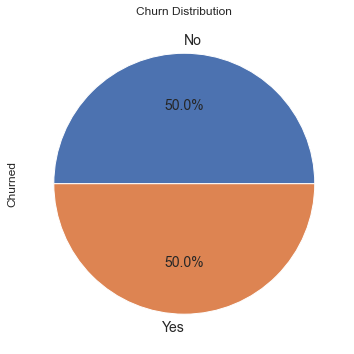

In [452]:
pie_chart = (y.value_counts()/X.shape[0])*100.0 
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churned',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

<br>
<span style="color: orange;">
	
**Splitting the dataset into train and test data**
</span>
<br>

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [454]:
X_train.shape, y_test.shape

((38528, 63), (16512,))

In [455]:
def plot_confusion_matrix(data):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    labels = ['Not Churned', "Churned"]

    sns.set(color_codes=True)
    plt.figure(1, figsize=(4, 4))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, fmt= 'd' , cmap="YlGnBu",cbar=None, linewidths=.5 , 
            annot_kws={"size": 12}) #,  cbar_kws={'label': 'Scale'}
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True", xlabel="Predicted")
 
  
    plt.show()



def analysis( ModelName, y_train , y_train_pred , y_test , y_test_pred ):
        """[summary]

        Args:
            ModelName ([type]): [description]
            y_train ([type]): [description]
            y_train_pred ([type]): [description]
            y_test ([type]): [description]
            y_test_pred ([type]): [description]
        """
        print("\n\nAnalysis for {}".format(ModelName))
        
        print("Precison is {}".format(precision_score( y_test , y_test_pred)))
        print("AUC Train : ", roc_auc_score( y_train , y_train_pred ))
        print("AUC Test : ", roc_auc_score( y_test , y_test_pred ))
        print("F1-Score : ", f1_score( y_test , y_test_pred , average = 'micro') )
        cm = confusion_matrix( y_test , y_test_pred )
        
        print("Recall score : {} and confusion matrix : \n {}".format(recall_score(y_test , y_test_pred), cm))
        print("\n")
        plot_confusion_matrix(cm)


<br>
<span style="color: orange;">

Since we are concerned about HVC getting churned so we will use metrics which highlight being positive or churned i.e. *sensitivity* while it might lead to some customer who might not churn in the list but that's fine from business perspective.


<br>

**Creating a class GenerateModel and defining various Machine Learning models in it. Through it we will check the performances of various model on our dataset and choose the best one.**
</span>
<br>

In [456]:
class GenerateModel():
    """[defining various Machine Learning models in it. 
        Through it we will check the performances of various model on our dataset and choose the best one]
    """
    def __init__(self,  X_train, y_train, X_test , y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.LogR = LogisticRegression()
        self.dt = DecisionTreeClassifier()
        self.rf = RandomForestClassifier()
        self.gb = xgb.XGBClassifier()

    def LogReg(_self):
        """[Logistic regression]

        Args:
            _self ([type]): [description]
        """
        m1 = _self.LogR.fit( X_train  , y_train)
        y_train_pred = m1.predict( X_train  )
        y_test_pred = m1.predict( X_test  )
        analysis("Logistic Regression",y_train , y_train_pred , y_test , y_test_pred )
    
    
    def RandomForestClassification(_self):
        """[Random Forest Classification]

        Args:
            _self ([type]): [description]
        """
        m2 = _self.rf.fit( X_train   , y_train)
        y_train_pred = m2.predict( X_train   )
        y_test_pred = m2.predict( X_test   )
        analysis("Random Forest Classifier",y_train , y_train_pred , y_test , y_test_pred )
      

    def XGBoostClassfication(_self):
        """[Extreme Gradient Boost Classfication]

        Args:
            _self ([type]): [description]
        """
        m3 = _self.gb.fit( X_train , y_train)
        y_train_pred = m3.predict( X_train )
        y_test_pred = m3.predict( X_test )
        analysis("XGBoost Classifier",y_train , y_train_pred , y_test , y_test_pred )

    def DecisionTreeClassification(_self):
        """[Decision Tree Classification]

        Args:
            _self ([type]): [description]
        """
        m4= _self.dt.fit(X_train , y_train)
        y_train_pred = m4.predict( X_train )
        y_test_pred = m4.predict( X_test )
        analysis("Decision Tree Classifier",y_train , y_train_pred , y_test , y_test_pred )
        

<br>
<span style="color: orange;">

## 4.1 Model building and analysis using PCA
	
**Creating PCA on train and test dataset**

</span>
<br>

In [457]:
NComponents = 36
_PCA3 = PCA(n_components=NComponents)    

X_train_pca = _PCA3.fit_transform(X_train)

X_test_pca = _PCA3.transform(X_test)

In [458]:
X_train_pca.shape, X_test_pca.shape

((38528, 36), (16512, 36))

<br>
<span style="color: orange;">
	
**Passing the PCA train and test set to generate the models with default hyper-parameter values**
</span>
<br>

In [459]:
gm = GenerateModel( X_train_pca, y_train, X_test_pca , y_test)



Analysis for Logistic Regression
Precison is 0.8228076506676291
AUC Train :  0.834919107783026
AUC Test :  0.83473126678065
F1-Score :  0.8345445736434108
Recall score : 0.844548709717249 and confusion matrix : 
 [[6940 1473]
 [1259 6840]]




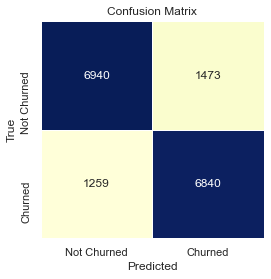



Analysis for Random Forest Classifier
Precison is 0.953609496124031
AUC Train :  1.0
AUC Test :  0.9632852686680564
F1-Score :  0.9631177325581395
Recall score : 0.9720953204099272 and confusion matrix : 
 [[8030  383]
 [ 226 7873]]




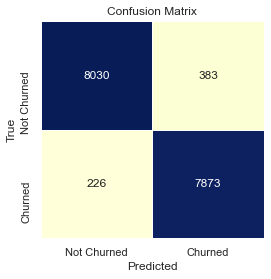

[21:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Analysis for XGBoost Classifier
Precison is 0.9737991266375546
AUC Train :  0.9904247270783094
AUC Test :  0.9693689264083931
F1-Score :  0.9694767441860465
Recall score : 0.9636992221261884 and confusion matrix : 
 [[8203  210]
 [ 294 7805]]




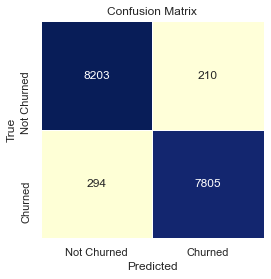

In [460]:
gm.LogReg()
gm.RandomForestClassification()
gm.XGBoostClassfication()

<br>
<span style="color: orange;">
	
**We can totally see that the Recall value is higher for Random Forest Classifier followed by XGBoostClassifier and Logistic Regression**
</span>
<br>

In [461]:
gm2 = GenerateModel( X_train_pca, y_train, X_test_pca , y_test)

<br>
<span style="color: orange;">
	
### 4.1.1 **Hyperparameter tuning**



**Logistic Regression - since we are feeding PCA parameters multicollinearity is already handled**

</span>
<br>

In [103]:
params_logR= {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty': ['l2', 'l1'],
            'C': [500, 200, 100, 10, 1.0, 0.5, 0.1]} 

<br>
<span style="color: orange;">
	
**Repeats Stratified K-Fold n times with different randomization in each repetition.**
</span>
<br>

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_logR = GridSearchCV(estimator=gm2.LogR, param_grid=params_logR, 
                                cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

In [113]:
%%time
grid_search_logR.fit(X_train_pca,y_train)

Fitting 30 folds for each of 42 candidates, totalling 1260 fits
Wall time: 4min 47s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [500, 200, 100, 10, 1.0, 0.5, 0.1],
                         'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [114]:
LogR_best_params = grid_search_logR.best_params_
print(LogR_best_params)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


<br>
<span style="color: orange;">
	
**Random Forest Classifier**

</span>
<br>

In [ ]:
params_rfc = {
    'max_depth': [ 5, 10, 20,  40, 50],
    'min_samples_leaf': [3, 5, 10, 20],
    'max_features': [2,3,4, 5, 10 ],
    'n_estimators': [20, 30,40,  50, 100]
            }

In [ ]:
grid_search_rf = GridSearchCV(estimator=gm2.rf, param_grid=params_rfc, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")

In [118]:
%%time
grid_search_rf.fit(X_train_pca,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Wall time: 37min 50s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 40, 50],
                         'max_features': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [3, 5, 10, 20],
                         'n_estimators': [20, 30, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [119]:
rf_best_params = grid_search_rf.best_params_
print(rf_best_params)

{'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 3, 'n_estimators': 100}


<br>
<span style="color: orange;">
	
**XGBoost Hyperparameter tuning**
</span>
<br>

In [ ]:
params_xgb = {
                'n_estimators' : [100, 200, 500], # no of trees 
                'learning_rate' : [ 0.1, 0.20,  0.30],  # eta
                'min_child_weight': [1, 5, 7, 10],
                'gamma': [ 0.5, 1],
                'subsample': [ 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 9,15, 20 ]
        }

folds = 3
param_comb = 50

<br>
<span style="color: orange;">
	
**Performing the RandomizedSearchCV for exhaustive search over a grid of parameters.**
</span>
<br>

In [121]:
random_search_xgb = RandomizedSearchCV(gm2.gb, param_distributions=params_xgb, 
                                    n_iter=param_comb, scoring='accuracy', 
                                     n_jobs=-1, cv=folds, verbose=3, random_state=42)
                                    
random_search_xgb.fit(X_train_pca,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[03:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [122]:
xgb_best_parms = random_search_xgb.best_params_
print(xgb_best_parms)

{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}



<br>
<span style="color: orange;">
	
**So the best hyperparameters are:**

    1. Logistic regression => {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


    2. Random forest classification => {'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 3, 'n_estimators': 100}
    

    3. XG Boost Classfication => {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}**

**Using the above values and let's see the performances of models**

</span>
<br>

In [462]:
gm2.LogR =LogisticRegression(C= 1.0, penalty='l2', solver='liblinear' )

gm2.rf = RandomForestClassifier(max_depth= 50,max_features= 10,
                                min_samples_leaf= 3, n_estimators= 100)

gm2.gb = xgb.XGBClassifier(subsample= 0.8, n_estimators= 500, min_child_weight= 5, max_depth= 15, 
                            learning_rate= 0.1, gamma= 1, colsample_bytree= 1.0)



Analysis for Logistic Regression
Precison is 0.8228928700252495
AUC Train :  0.8346084714854378
AUC Test :  0.8349782108478189
F1-Score :  0.8347868217054263
Recall score : 0.8450425978515866 and confusion matrix : 
 [[6940 1473]
 [1255 6844]]




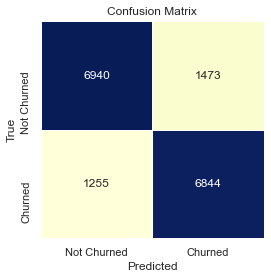



Analysis for Random Forest Classifier
Precison is 0.9473748176956733
AUC Train :  0.9913395856036334
AUC Test :  0.9554982677738125
F1-Score :  0.9553657945736435
Recall score : 0.9624645017903445 and confusion matrix : 
 [[7980  433]
 [ 304 7795]]




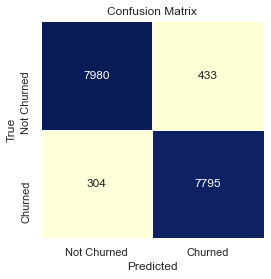

[21:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Analysis for XGBoost Classifier
Precison is 0.9735115732145068
AUC Train :  0.9999742546727769
AUC Test :  0.9728353600891687
F1-Score :  0.9728682170542635
Recall score : 0.971107544141252 and confusion matrix : 
 [[8199  214]
 [ 234 7865]]




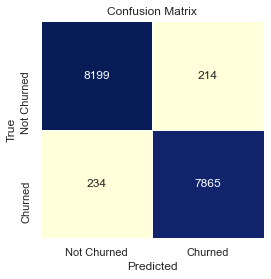

In [463]:
gm2.LogReg()
gm2.RandomForestClassification()
gm2.XGBoostClassfication()

<br>
<span style="color: orange;">
	
**After hyperparamter tuning, the AUC train/test and recall score for XGBoost Classifier is more followed by Random Forest Classifier and LogisticRegression. Thus we will go ahead with *XGBoost model* and use it for the prediction.**
</span>
<br>

<br>
<span style="color: yellow;">
	
# 5. **Interpretation - Decision Tree Classification**
</span>
<br>


In [465]:
gm3 = GenerateModel(X_train, y_train, X_test , y_test)

In [466]:
gm3.dt = DecisionTreeClassifier()

In [467]:
params_dt = {
    'max_depth': [ 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search_dt = GridSearchCV(estimator=gm3.dt, 
                           param_grid=params_dt, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search_dt.fit(X_train, y_train)

print(grid_search_dt.best_params_)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}


In [468]:
grid_search_dt.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [473]:
gm3.dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, min_samples_leaf= 5)



Analysis for Decision Tree Classifier
Precison is 0.8934207331876669
AUC Train :  0.9611250018921274
AUC Test :  0.9021959353675784
F1-Score :  0.9020712209302325
Recall score : 0.9087541671811334 and confusion matrix : 
 [[7535  878]
 [ 739 7360]]




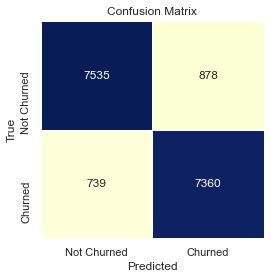

In [474]:
gm3.DecisionTreeClassification()

<br>
<span style="color: orange;">
	
**We got AUC of 90% & Recall score of 90.87%**
</span>
</span>
<br>

<br>
<span style="color: orange;">
	
**Checking out the important features which can be used to predict the required outcome**
</span>
<br>

In [475]:
imp_df = pd.DataFrame({"Importance": gm3.dt.feature_importances_*100}, index = X_train.columns)
imp_df.sort_values(by="Importance", ascending=False).head(30)

Importance
total_ic_mou_8                38.173152
last_day_rch_amt_8             7.463532
fb_user_8                      5.992684
night_pck_user_8               5.949183
total_rech_num_8               2.859481
total_og_mou_8                 2.708876
max_rech_amt_7                 1.833421
total_rech_amt_data_8          1.798610
last_day_rch_amt_7             1.794920
total_avg_ic_mou_6_7_Good      1.562433
offnet_mou_7                   1.539225
aon                            1.285764
last_day_rch_amt_6             1.247708
total_rech_num_6               1.141050
monthly_3g_6                   1.116354
av_rech_amt_data_8             1.091061
total_avg_arpu_6_7_Good        1.078250
max_rech_amt_8                 1.006869
onnet_mou_7                    0.975921
max_rech_amt_6                 0.949342
total_rech_amt_7               0.920632
offnet_mou_8                   0.894463
monthly_3g_7                   0.846250
total_rech_num_7               0.841552
total_avg_vbc_3g_6_7_Good      0.817262
arpu_8                         0.802186
total_avg_rech_amt_6_7_Good    0.799991
sep_vbc_3g                     0.767732
total_rech_data_8              0.720529
total_rech_amt_8               0.720527

Text(0.5, 1.0, 'Top 25 contributing features for the churning')

<Figure size 1080x720 with 0 Axes>

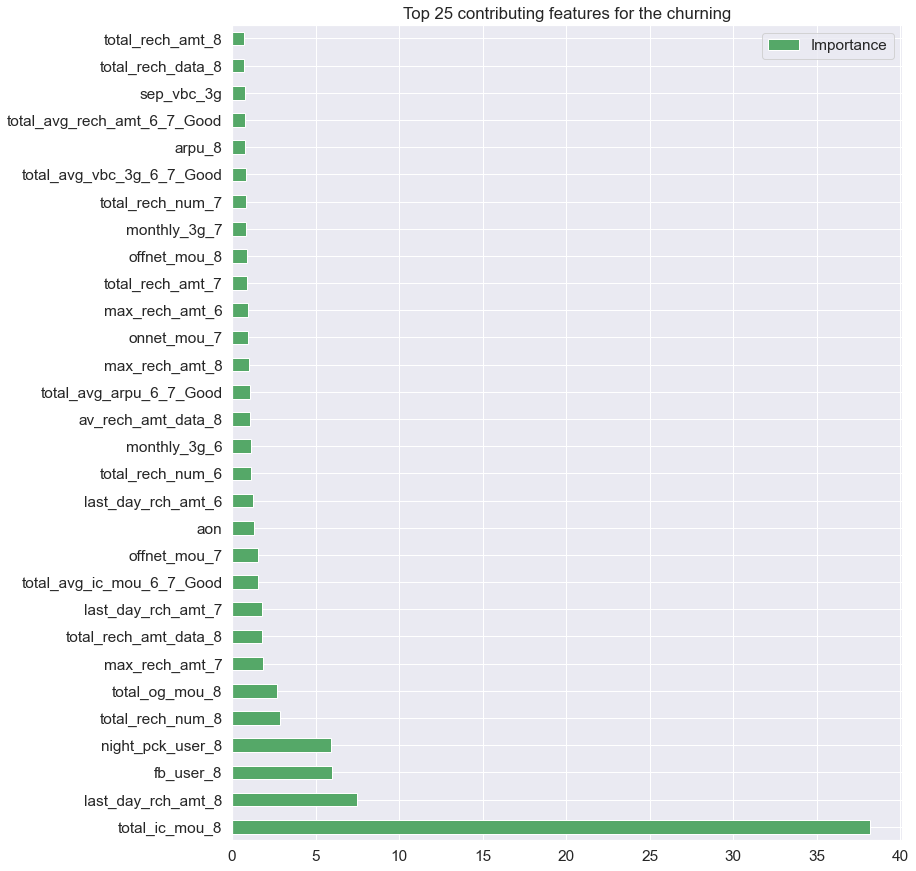

In [476]:
plt.figure(figsize=[15,10])
imp_df.sort_values(by="Importance", ascending=False)[:30].plot.barh(color = 'g')
plt.title('Top 25 contributing features for the churning')

<br>



<span style="color: yellow;">

# **6. Conculsion**	
</span>
<br>
<span style="color: orange;">




**The following top 25 features should be considered while prediciting a model:** 

        •  total_ic_mou_8
        •  last_day_rch_amt_8
        •  fb_user_8
        •  av_rech_amt_data_8
        •  total_rech_num_8
        •  total_og_mou_8
        •  last_day_rch_amt_7
        •  total_avg_ic_mou_6_7_Good
        •  total_rech_amt_7
        •  aon
        •  total_rech_num_7
        •  max_rech_amt_7
        •  onnet_mou_7
        •  offnet_mou_8
        •  last_day_rch_amt_6
        •  total_avg_arpu_6_7_Good
        •  total_avg_og_mou_6_7_Good
        •  total_rech_num_6
        •  total_avg_rech_amt_6_7_Good
        •  arpu_8
        •  onnet_mou_8
        •  onnet_mou_6
        •  offnet_mou_7
        •  total_rech_amt_6
        •  max_rech_amt_6
        •  offnet_mou_6
        •  sep_vbc_3g
        •  max_rech_amt_8
        •  aug_vbc_3g
        •  total_avg_vol_3g_mb_6_7_Good
</span>
</span>
<br>


<br>
<span style="color: orange;">
	
## 6.1 Recommendations

    ○ Incoming/Outgoing call & data recharge in the august month are perhaps most important indicators of churning. 
    
    ○ Thus some kind of offer must be released when such behaviour is observed.

    ○ Reduction in data usage in the month of august is an indicator of churn.

    ○ Reduction of recharge number is an indicator of churn.

    ○ HV Customers who are subscribed for less < 4 Years are more prone to churn.

    ○ Average revenue per user is important indicator.

    ○ One, observation that the telecom have not received any new HV customer in last 6 months which needs to be looked at topmost priority.

    ○ 2g/3g geographical coverage can also be probable churning reason.


</span>
<br>

